## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

In [9]:
import json

with open('data.json','r') as f:
    data=json.load(f)

nodes=data['nodes']  #["用户名",影响力分数]
edges=data['edges']  #["用户名1","用户名2",关系权重]

network = {}
for edge in edges:
    user1,user2,weight=edge
    if user1 not in network:
        network[user1]={}
    if user2 not in network:
        network[user2]={}
    network[user1][user2]=weight
    network[user2][user1]=weight
    
direct_friends={user: list(friends.keys()) for user, friends in network.items()}
for user, friends in direct_friends.items():
    print(f"{user} 的朋友: {', '.join(friends)}")

degree_centrality={user: len(friends) for user, friends in direct_friends.items()}
top_5_by_degree=sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("度数最多的前5个用户:")
for user, degree in top_5_by_degree:
    print(f"{user}: {degree}个朋友")

influence_scores={user: score for user, score in nodes}
top_5_influence=sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]

print("影响力最高的前5个用户:")
for user, influence in top_5_influence:
    print(f"{user}: 影响力得分 {influence}")

combined_influence={
    user:0.5*influence_scores[user]+0.5*degree_centrality.get(user, 0)
    for user in influence_scores
}

top_5_combined=sorted(combined_influence.items(), key=lambda x: x[1], reverse=True)[:5]

print("综合影响力最高的前5个用户:")
for user, score in top_5_combined:
    print(f"{user}: 综合得分 {score}")

target_user="Yanyan-Wang"
friends_of_target=direct_friends[target_user]

potential_friends={}
for friend in friends_of_target:
    for fof in direct_friends[friend]:
        if fof != target_user and fof not in friends_of_target:
            if fof not in potential_friends:
                potential_friends[fof]=0
            potential_friends[fof]+=1 

recommended_friends=sorted(potential_friends.items(), key=lambda x: x[1], reverse=True)
print(f"为 {target_user} 推荐的新朋友:")
for user, common_friends in recommended_friends:
    print(f"{user}: {common_friends} 个共同朋友")

strength_with_target=network[target_user]
top_5_by_strength=sorted(strength_with_target.items(), key=lambda x: x[1], reverse=True)[:5]
print(f"与 {target_user} 连接强度最高的前5个用户:")
for user, strength in top_5_by_strength:
    print(f"{user}: 连接强度 {strength}")


Yanyan-Wang 的朋友: Aarebecca, pomelo-nwu, yangzy0603, tyn1998, yvonneyx, lidongze0629, RackweLLizm, yikenie, yubo0923, Maple0817, wj23027, frank-zsy, andyhuang18, bifenglin
Aarebecca 的朋友: Yanyan-Wang, pomelo-nwu, yangzy0603, yvonneyx, lidongze0629, tyn1998, RackweLLizm, yikenie, yubo0923, Maple0817, frank-zsy
pomelo-nwu 的朋友: Yanyan-Wang, Aarebecca, yangzy0603, tyn1998, lidongze0629, yvonneyx, RackweLLizm, yikenie, bifenglin, frank-zsy, yubo0923, wj23027, andyhuang18, Maple0817, will-ww, zhicheng-ning, PureNatural, xiaoya-yaya, xgdyp, longyanz, Zzzzzhuzhiwei, birdflyi, lhbvvvvv, zhaosj975
andyhuang18 的朋友: tyn1998, wj23027, will-ww, zhicheng-ning, lhbvvvvv, frank-zsy, bifenglin, wxharry, Zzzzzhuzhiwei, stevending1st, PureNatural, pranavshuklaa, pomelo-nwu, stealth-bombeer, Vlad116, kunal8411, xgdyp, longyanz, xiaoya-yaya, zhaosj975, birdflyi, Yanyan-Wang, yangzy0603
tyn1998 的朋友: andyhuang18, pomelo-nwu, frank-zsy, wj23027, bifenglin, Yanyan-Wang, will-ww, Zzzzzhuzhiwei, lhbvvvvv, zhicheng-

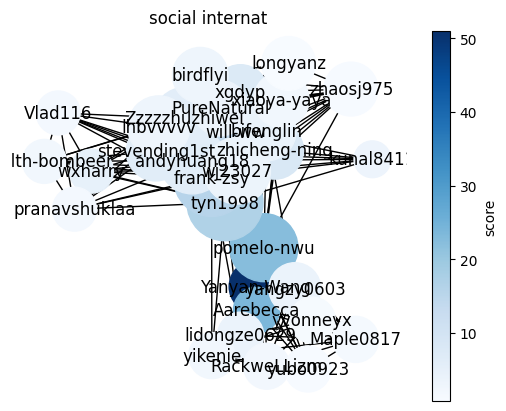

Top 5 influncer:
Yanyan-Wang: score 50.95
Aarebecca: score 23.82
pomelo-nwu: score 22.36
tyn1998: score 16.64
frank-zsy: score 15.8


In [8]:
import json
import networkx as nx
import matplotlib.pyplot as plt

with open('data.json','r') as f:
    data=json.load(f)

nodes=data['nodes']
edges=data['edges']
G=nx.Graph()
for user, influence in nodes:
    G.add_node(user,influence=influence)

for edge in edges:
    user1,user2,weight=edge
    G.add_edge(user1,user2,weight=weight)

influence_values=[G.nodes[user]['influence'] for user in G.nodes]
degree_values=[G.degree(user) for user in G.nodes]

pos=nx.spring_layout(G)

nodes=nx.draw_networkx_nodes(G,pos,node_size=[d * 100 for d in degree_values],node_color=influence_values,cmap=plt.cm.Blues)

nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
sm=plt.cm.ScalarMappable(cmap=plt.cm.Blues,norm=plt.Normalize(vmin=min(influence_values),vmax=max(influence_values)))
sm.set_array([])

cbar=plt.colorbar(sm,ax=plt.gca(),label='score')

plt.title('social internat')
plt.axis('off')
plt.show()

influence_dict=dict(zip(G.nodes, influence_values))
sorted_influence=sorted(influence_dict.items(),key=lambda x: x[1],reverse=True)

print("Top 5 influncer:")
for user, score in sorted_influence[:5]:
    print(f"{user}: score {score}")